<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230112.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [2]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta
import os
import re

from functools import reduce
from collections import defaultdict

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'sales.csv',
 '1_order_payments_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'ecommerce-data.csv',
 'test.csv',
 'sample-sales-data.csv',
 '1_customers_dataset.csv',
 'match_result_test.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'app_wau.csv',
 'online_retail.xlsx',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'bz_data_analyis.csv',
 'mock_sales_data.csv',
 'sales_vs_discount.csv',
 'sales_data_with_stores.csv',
 'online_retail_II.xlsx',
 'groceries.csv',
 'mall_customers.csv',
 'scanner_data.csv',
 'ab_experiment.csv',
 '1_orders_dataset.csv',
 'sample_data']

In [20]:
df = pd.read_csv('app_wau.csv')
df['occurred_at'] = pd.to_datetime(df['occurred_at'])
df['date'] = df['occurred_at'].to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['weekday'] = df['date'].dt.weekday
df.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,weekday
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4


In [21]:
list_weekday = dict(zip(range(7), ['mon','tue','wed','thu','fri','sat','sun']))
df['weekday'] = df['weekday'].apply(lambda x : list_weekday.get(x,x))
df['weekday'].astype('category').cat.reorder_categories([a for a in list_weekday.values()], inplace = True)
df.head()

<ipython-input-21-b0ee8a43b659>:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.


,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,weekday
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri


In [22]:
df[['event_type', 'event_name']].value_counts()

event_type   event_name            
engagement   home_page                 94065
             like_message              59248
             view_inbox                55936
             login                     38610
             send_message              33105
             search_autocomplete       17820
             search_run                13019
signup_flow  create_user                7298
             enter_email                4407
             enter_info                 3872
             complete_signup            3680
engagement   search_click_result_2      1499
             search_click_result_1      1413
             search_click_result_4      1264
             search_click_result_3      1134
             search_click_result_5       968
             search_click_result_6       805
             search_click_result_9       784
             search_click_result_7       709
             search_click_result_8       690
             search_click_result_10      506
dtype: int64

In [11]:
 df[(df['event_type'] == 'signup_flow') & (df['user_id']==11768.0)]

,user_id,occurred_at,event_type,event_name,location,device,user_type,date
391,11768.0,2014-05-01 08:01:36,signup_flow,create_user,France,macbook pro,NaN,2014-05-01
392,11768.0,2014-05-01 08:02:06,signup_flow,enter_email,France,macbook pro,NaN,2014-05-01
393,11768.0,2014-05-01 08:02:39,signup_flow,enter_info,France,macbook pro,NaN,2014-05-01
394,11768.0,2014-05-01 08:03:12,signup_flow,complete_signup,France,macbook pro,3.0,2014-05-01


In [29]:
df_signup = df[df['event_type'] == 'signup_flow']
df_signup['event_name'].astype('category').cat.reorder_categories(['create_user','enter_email','enter_info','complete_signup'], inplace = True)
df_signup.head()

<ipython-input-29-e9429ed08f05>:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.


,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,weekday
391,11768.0,2014-05-01 08:01:36,signup_flow,create_user,France,macbook pro,NaN,2014-05-01,2014-04-28,thu
392,11768.0,2014-05-01 08:02:06,signup_flow,enter_email,France,macbook pro,NaN,2014-05-01,2014-04-28,thu
393,11768.0,2014-05-01 08:02:39,signup_flow,enter_info,France,macbook pro,NaN,2014-05-01,2014-04-28,thu
394,11768.0,2014-05-01 08:03:12,signup_flow,complete_signup,France,macbook pro,3.0,2014-05-01,2014-04-28,thu
401,11769.0,2014-05-01 02:37:43,signup_flow,create_user,United Kingdom,lenovo thinkpad,NaN,2014-05-01,2014-04-28,thu


In [52]:
cnt_location = df_signup['location'].value_counts().reset_index().rename(columns = {'index':'location','location':'cnt'})
cnt_location['cnt'] = cnt_location['cnt'].astype(int)
cnt_location['ratio'] = cnt_location[['cnt']].apply(lambda x : round(x/sum(x)*100,2))
cnt_location['location2'] = [a if b >= 3 else 'etc' for a, b in zip(cnt_location['location'], cnt_location['ratio'])]
cnt_location.drop(['cnt', 'ratio'], axis = 1, inplace=True)
cnt_location.head()
#list_location = dict(zip(cnt_location['location'], cnt_location['location2']))

,location,location2
0,United States,United States
1,Japan,Japan
2,Germany,Germany
3,France,France
4,United Kingdom,United Kingdom


In [57]:
df_signup = pd.merge(df_signup, cnt_location, 'left', 'location')
df_signup.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,weekday,location2
0,11768.0,2014-05-01 08:01:36,signup_flow,create_user,France,macbook pro,NaN,2014-05-01,2014-04-28,thu,France
1,11768.0,2014-05-01 08:02:06,signup_flow,enter_email,France,macbook pro,NaN,2014-05-01,2014-04-28,thu,France
2,11768.0,2014-05-01 08:02:39,signup_flow,enter_info,France,macbook pro,NaN,2014-05-01,2014-04-28,thu,France
3,11768.0,2014-05-01 08:03:12,signup_flow,complete_signup,France,macbook pro,3.0,2014-05-01,2014-04-28,thu,France
4,11769.0,2014-05-01 02:37:43,signup_flow,create_user,United Kingdom,lenovo thinkpad,NaN,2014-05-01,2014-04-28,thu,United Kingdom


In [68]:
cnt_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   week       180 non-null    datetime64[ns]
 1   location2  180 non-null    object        
 2   cnt        180 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.3+ KB


In [80]:
cnt_login = df_signup.groupby(['week','event_name','location2'])['user_id'].count().reset_index().rename(columns = {'user_id':'cnt'})
cnt_login['ratio'] = cnt_login.groupby(['week', 'location2'])['cnt'].apply(lambda x : round(x/sum(x)*100,2))
cnt_login

,week,event_name,location2,cnt,ratio
0,2014-04-28,complete_signup,Brazil,7,24.14
1,2014-04-28,complete_signup,France,5,17.24
2,2014-04-28,complete_signup,Germany,5,16.67
3,2014-04-28,complete_signup,India,1,16.67
4,2014-04-28,complete_signup,Italy,2,20.00
...,...,...,...,...,...
715,2014-08-25,enter_info,Japan,25,23.15
716,2014-08-25,enter_info,Russia,14,22.58
717,2014-08-25,enter_info,United Kingdom,11,20.75
718,2014-08-25,enter_info,United States,77,19.79


In [89]:
def get_plot(df) : 
    
    list_event = cnt_login['event_name'].unique()

    for events in list_event : 
      temp = df[df['event_name'] == events]
      plt.figure(figsize = (12,7))
      sns.lineplot(data = temp, x = 'week', y = 'ratio', hue = 'location2')
      plt.title(f'{events}')
      plt.show()

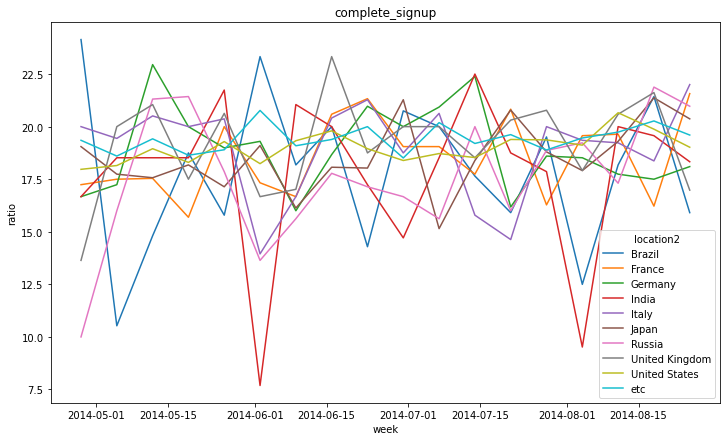

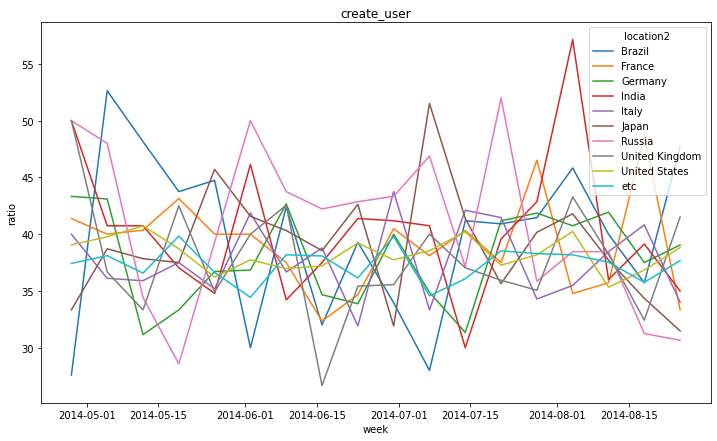

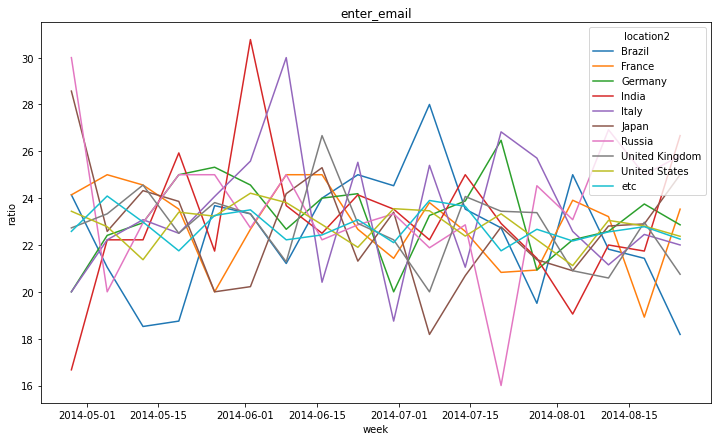

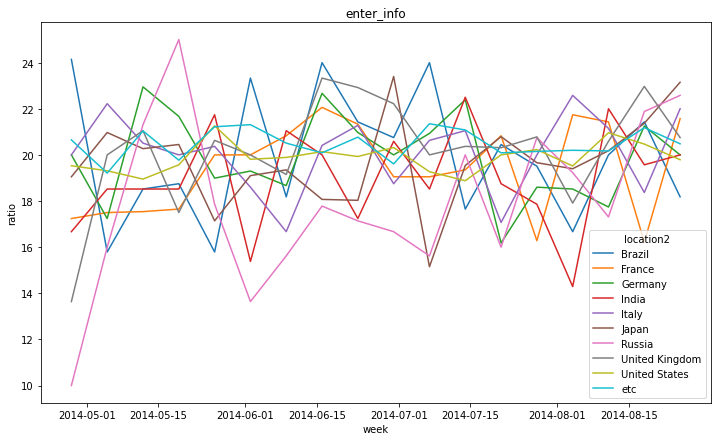

In [90]:
get_plot(cnt_login)

# Iterators

In [91]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [92]:
{ k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}